## Creation of DFR3 and mapping objects

Analyses use DFR3 mapping sets from IN-CORE service to associate each element of a given set with one or more elements of a second set of DFR3 curves. In IN-CORE and pyIncore specifically, a building inventory (given set) is mapped to a (second) set of fragility curves.

This tutorial shows examples of how to create **DFR3** and **mapping** objects for fragility, restoration and repair curves as well as how to use them in **pyIncore**.

A user can upload a DFR3 or mapping set to the DFR3 services or use it locally. This tutorial covers both options. 

![alt text](images/lookup_fragility_id.png)

Please note that in this notebook we use term *function* in programming context as a class function and *curve* as a function in mathematical context (lognormal curve).

In [1]:
from pyincore import FragilityService, IncoreClient
from pyincore import Mapping, MappingSet, FragilityCurveSet, StandardFragilityCurve
from pyincore import ConditionalStandardFragilityCurve, PeriodStandardFragilityCurve

In [2]:
# IN-CORE client
client = IncoreClient()

# Initiate fragility service
fragility_services = FragilityService(client)

### Fragility set object

In this section we are going to explore the creation of **fragility** sets and curves used by the **pyIncore** library in hazard analyses. We provide examples of getting the curves into your project as well as basic use of pyIncore's functions to print and visualize various attributes and variables.

Below is an example of a fragility set with three curves and metadata defined as JSON object with key/value pairs.

In [3]:
fragility_data = {       
    "description": "Test Tsunami fragility when < 5000 ft^2",
    "authors": [
        "Federal Emergency Management Agency (FEMA)"
    ],      
    "resultType": "Limit State",
    "demandType": "momentumFlux",
    "demandUnits": "ft^3/s^2",
    "hazardType": "tsunami",
    "inventoryType": "building",
    "fragilityCurves": [
        {
            "className": "StandardFragilityCurve",
            "description": "Immediate Occupancy",
            "alpha": 1.0,
            "beta": 0.74,
            "alphaType": "median",
            "curveType": "LogNormal"
        },
        {
            "className": "StandardFragilityCurve",
            "description": "Life Safety",
            "alpha": 2.0,
            "beta": 0.74,
            "alphaType": "median",
            "curveType": "LogNormal"
        },
        {
            "className": "StandardFragilityCurve",
            "description": "Collapse Prevention",
            "alpha": 3.1,
            "beta": 0.77,
            "alphaType": "lambda",
            "curveType": "LogNormal"
        }
    ]       
}

created_fragility = fragility_services.create_dfr3_set(fragility_data)
created_fragility

{'id': '5f21cba72f4d0b19552e7e69',
 'legacyId': None,
 'description': 'Test Tsunami fragility when < 5000 ft^2',
 'authors': ['Federal Emergency Management Agency (FEMA)'],
 'paperReference': None,
 'resultUnit': None,
 'resultType': 'Limit State',
 'hazardType': 'tsunami',
 'inventoryType': 'building',
 'creator': 'mondrejc',
 'demandType': 'momentumFlux',
 'demandUnits': 'ft^3/s^2',
 'fragilityCurves': [{'className': 'StandardFragilityCurve',
   'description': 'Immediate Occupancy',
   'alpha': 1.0,
   'beta': 0.74,
   'alphaType': 'median',
   'curveType': 'LogNormal'},
  {'className': 'StandardFragilityCurve',
   'description': 'Life Safety',
   'alpha': 2.0,
   'beta': 0.74,
   'alphaType': 'median',
   'curveType': 'LogNormal'},
  {'className': 'StandardFragilityCurve',
   'description': 'Collapse Prevention',
   'alpha': 3.1,
   'beta': 0.77,
   'alphaType': 'lambda',
   'curveType': 'LogNormal'}]}

#### 1. Using IDs from IN-CORE DFR3 services

In the first example we use IN-CORE's DFR3 service to get fragility curves and to set a local DFR3 object. We need an ID number of a set in the service. A user can look up the fragility IDs in the DFR3 viewer.

In [4]:
# Set fragility set id from the service
fragility_set_id = "5b47b2d7337d4a36187c61ce"

# Get local fragility curve set
fragility_curve_set = FragilityCurveSet(fragility_services.get_dfr3_set(fragility_set_id))

fragility_curve_set

#### 2. Writing JSON definition

In the second example we define a fragility set as a text string with JSON type key/value pairs 
which will then be converted to a JSON object. **Note** It is necessary to use the specified types of quotes 
to create the string.

In [5]:
fragility_set_json_str = '''{
    "id": "5b47b2d7337d4a36187c61ce",
    "legacyId": "SF_S1_206",
    "description": "Mid-Rise Steel Moment Frame",
    "authors": [
        "Elnashai and Jeong"
    ],
    "paperReference": null,
    "resultUnit": null,
    "resultType": "Limit State",
    "hazardType": "earthquake",
    "inventoryType": "building",
    "creator": "incore",
    "demandType": "PGA",
    "demandUnits": "g",
    "fragilityCurves": [
        {
            "className": "PeriodStandardFragilityCurve",
            "description": "Moderate",
            "alpha": -0.571,
            "beta": 0.665,
            "alphaType": "lambda",
            "curveType": "LogNormal",
            "periodParam2": 0,
            "periodParam1": 0,
            "periodParam0": 1.08,
            "periodEqnType": 1
        },
        {
            "className": "PeriodStandardFragilityCurve",
            "description": "Extensive",
            "alpha": 0.352,
            "beta": 0.675,
            "alphaType": "lambda",
            "curveType": "LogNormal",
            "periodParam2": 0,
            "periodParam1": 0,
            "periodParam0": 1.08,
            "periodEqnType": 1
        },
        {
            "className": "PeriodStandardFragilityCurve",
            "description": "Complete",
            "alpha": 1.341,
            "beta": 0.746,
            "alphaType": "lambda",
            "curveType": "LogNormal",
            "periodParam2": 0,
            "periodParam1": 0,
            "periodParam0": 1.08,
            "periodEqnType": 1
        }
    ]
}
'''
fragility_curve_set = FragilityCurveSet.from_json_str(fragility_set_json_str)
fragility_curve_set

#### 3. Constructing a fragility set from individual curves

In the third example we define the fragility curves as JSON objects first and then combine them into a set. We define the proper set metadata as well.

In [6]:
# create a period standard fragility curve set with three limit state
fragility_curve_moderate = PeriodStandardFragilityCurve({
    "description": "Moderate",
    "alpha": -0.571,
    "beta": 0.665,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":1.08,
    "periodEqnType":1
})

fragility_curve_extensive = PeriodStandardFragilityCurve({
    "description": "Extensive",
    "alpha": 0.352,
    "beta": 0.675,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":1.08,
    "periodEqnType":1
})

fragility_curve_complete = PeriodStandardFragilityCurve({
    "description": "Complete",
    "alpha": 1.341,
    "beta": 0.746,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":1.08,
    "periodEqnType":1
})

In [7]:
# place three curves into a set with extra metadata
metadata = {
    "id":"local_fragility_curve_set",
    "description": "Mid-Rise Steel Moment Frame",
    "demandType": "PGA",
    "demandUnits": "g",
    "resultType":"Limit State",
    "hazardType":"earthquake",
    "inventoryType":"building",
    "fragilityCurves":[
        fragility_curve_moderate,
        fragility_curve_extensive,
        fragility_curve_complete,
    ]
}

# construct the fragility curve object to use
fragility_curve_set = FragilityCurveSet(metadata)
fragility_curve_set

#### 4. Loading a fragility set from a JSON file

In the last example we load the fragility curves from a JSON file. This is similar to Example 2 because the file content is read as a text string.

In [8]:
fragility_curve_set2 = FragilityCurveSet.from_json_file("files/periodStandardFragilityCurve.json")

### Examples of fragility set and curve use

#### Damage probability calculation

We use the previously defined fragility set to calculate a limit state. We will use the fragility set object from Example 3 in **Creation of a fragility curve set object** section.

In [9]:
probabilities = fragility_curve_set.calculate_limit_state(hazard=10, period=1, std_dev=0.1)
probabilities

OrderedDict([('immocc', 0.999990362886121),
             ('lifesfty', 0.9978721323375376),
             ('collprev', 0.8992978633268922)])

#### Curve visualization

To calculate and visualize the three curve objects from the fragility set we use numerical scientific libraries and a visualization library. The parameters are passed to the lognormal curve defined in scipy library.

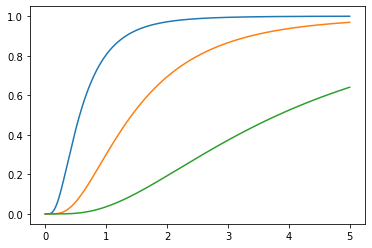

In [10]:
from scipy.stats import lognorm
import pylab as pl
import numpy as np

mean_moderate = fragility_curve_moderate.alpha
stddev_moderate = fragility_curve_moderate.beta
dist_moderate = lognorm(s=stddev_moderate, scale=np.exp(mean_moderate))
x=np.linspace(0,5,200)
pl.plot(x,dist_moderate.cdf(x))

mean_extensive = fragility_curve_extensive.alpha
stddev_extensive = fragility_curve_extensive.beta
dist_extensive = lognorm(s=stddev_extensive, scale=np.exp(mean_extensive))
x=np.linspace(0,5,200)
pl.plot(x,dist_extensive.cdf(x))

mean_complete = fragility_curve_complete.alpha
stddev_complete = fragility_curve_complete.beta
dist_complete = lognorm(s=stddev_complete, scale=np.exp(mean_complete))
x=np.linspace(0,5,200)
pl.plot(x,dist_complete.cdf(x))

#### Various help and computation functions on each individual curve

In this example we define a fragility curve using a JSON object and then use different functions to print hazard, 
infrastructure and ground phenomenon variables; a building period, a limit state probability and liquefaction. 

In [11]:
# exmample of a single period standard fragility curve
fragility_curve_moderate = PeriodStandardFragilityCurve({
    "description": "Moderate",
    "alpha": -0.571,
    "beta": 0.665,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":1.08,
    "periodEqnType":1
})

# get building period from the fragility curve
building_period = fragility_curve_moderate.get_building_period(num_stories = 10)
print("building period is :", building_period, "\n" )

# get limit state probability
probability = fragility_curve_moderate.calculate_limit_state_probability(hazard = 4)
print("limit state probability is :" , probability, "\n")

# adjust this curve for liquefaction
print("(alpha, beta) before liquefaction adjust:", fragility_curve_moderate.alpha, fragility_curve_moderate.beta)
fragility_curve_moderate.adjust_fragility_for_liquefaction(liquefaction = "U")
print("(alpha, beta) after liquefaction adjust:", fragility_curve_moderate.alpha, fragility_curve_moderate.beta)

building period is : 1.08 

limit state probability is : 0.9983763310617616 

(alpha, beta) before liquefaction adjust: -0.571 0.665
(alpha, beta) after liquefaction adjust: -0.48534999999999995 0.665


### DFR3 Mapping Set

In this section we are going to explore creation of **mapping** rules used by the **pyIncore** library in hazard analyses. We again provide three examples of getting the mappings into your project as well as basic use of DFR3 mappings in pyIncore.

Below is an example of a mapping set with three rules and metadata defined as a JSON object with key/value pairs. Fragility curves are defined by ID codes and structural types define units of infrastructure.

In [12]:
mapping_data = {
  "name": "pytest - Tsunami Building Fragility Mapping",
  "hazardType": "tsunami",
  "inventoryType": "building",
  "mappingType": "fragility",
  "mappings": [
      {
          "entry": {
              "Non-Retrofit Inundation Fragility ID Code": "5bbbaedfec2309046c2745c8",
              "Non-Retrofit MomentumFlux Fragility ID Code": "5bbbae19ec2309046c2745c6"
          },
          "rules": [
              [
                 "java.lang.String struct_typ EQUALS W1"
              ]
          ]
      },
      {
          "entry": {
              "Non-Retrofit Inundation Fragility ID Code": "5bbbaf58ec2309046c2745c9",
              "Non-Retrofit MomentumFlux Fragility ID Code": "5bbbae5eec2309046c2745c7"
          },
          "rules": [
              [
                  "java.lang.String struct_typ EQUALS W2"
              ]
          ]
      },
      {
          "entry": {
               "Non-Retrofit Inundation Fragility ID Code": "5bbbafcdec2309046c2745ca",
              "Non-Retrofit MomentumFlux Fragility ID Code": "5bbbba6bec2309046c2745d8"
          },
          "rules": [
              [
                  "java.lang.String struct_typ EQUALS RC"
              ]
          ]
      }
  ]
}
created_mapping = fragility_services.create_mapping(mapping_data)
created_mapping

{'id': '5f21cba731c60d05afa2aafd',
 'name': 'pytest - Tsunami Building Fragility Mapping',
 'hazardType': 'tsunami',
 'inventoryType': 'building',
 'mappings': [{'legacyEntry': {},
   'entry': {'Non-Retrofit Inundation Fragility ID Code': '5bbbaedfec2309046c2745c8',
    'Non-Retrofit MomentumFlux Fragility ID Code': '5bbbae19ec2309046c2745c6'},
   'rules': [['java.lang.String struct_typ EQUALS W1']]},
  {'legacyEntry': {},
   'entry': {'Non-Retrofit Inundation Fragility ID Code': '5bbbaf58ec2309046c2745c9',
    'Non-Retrofit MomentumFlux Fragility ID Code': '5bbbae5eec2309046c2745c7'},
   'rules': [['java.lang.String struct_typ EQUALS W2']]},
  {'legacyEntry': {},
   'entry': {'Non-Retrofit Inundation Fragility ID Code': '5bbbafcdec2309046c2745ca',
    'Non-Retrofit MomentumFlux Fragility ID Code': '5bbbba6bec2309046c2745d8'},
   'rules': [['java.lang.String struct_typ EQUALS RC']]}],
 'creator': 'mondrejc',
 'mappingType': 'fragility'}

#### 1. Using mapping IDs from IN-CORE DFR3 services

In the first example we use IN-CORE's DFR3 service to get mappings and to set a local mapping set object. 
We need an ID number of the mapping set in the service. A user can look up the fragility mapping IDs in the DFR3 viewer.

In [13]:
mapping_id = "5b8ec84fec2309047299581f"

client = IncoreClient()
fragility_service = FragilityService(client)
mapping_set = MappingSet(fragility_service.get_mapping(mapping_id))
mapping_set

#### 2. Writing a mapping definition file

In the second example we define a mapping set as a text string with JSON type key/value pairs 
which then will be converted into a JSON object. **Note** It is necessary to use the specified types of quotes 
to create the string.

In [14]:
mapping_set_json_str = '''
{
    "id": "5b8ec84fec2309047299581f",
    "name": "Shelby Water Network MMSA",
    "hazardType": "earthquake",
    "inventoryType": "water_facility",
    "mappings": [
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d81ffec230904683d5073"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'tank'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d8284ec230904683d5074"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'booster_pump'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d8284ec230904683d5074"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'pump_0'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d829aec230904683d5075"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'pump_1'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d82a6ec230904683d5076"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'pump_2'"
                ]
            ]
        },
        {
            "legacyEntry": {},
            "entry": {
                "pga": "5b7d82b3ec230904683d5077"
            },
            "rules": [
                [
                    "java.lang.String data_type EQUALS 'pump'",
                    "java.lang.String subtype EQUALS 'pump_3'"
                ]
            ]
        }
    ],
    "mappingType": "fragility"
}
'''

mapping_set = MappingSet.from_json_str(mapping_set_json_str)
mapping_set

#### 3. Constructing a mapping set from individual components

In the last example we provide a full set of instructions for

Creating a fragility object with curves required for mapping. You may either:
1. use curve objects (similar to example 3 in Fragility section)
2. or load a fragility JSON file (example 4)
3. creating a mapping set object by putting fragility sets into the mappings
4. adding metadata to the mapping object

1. Create a fragility set from curve objects (example 3 above).

In [15]:
fragility_curve_moderate = PeriodStandardFragilityCurve({
    "description": "Moderate",
    "alpha":-0.453,
    "beta": 0.794,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":0.75,
    "periodEqnType":1
})
fragility_curve_extensive = PeriodStandardFragilityCurve({
    "description": "Extensive",
    "alpha": 0.372,
    "beta": 0.794,
    "alphaType": "lambda",
    "curveType": "LogNormal",
    "periodParam2": 0,
    "periodParam1": 0,
    "periodParam0": 0.75,
    "periodEqnType": 1
})
fragility_curve_complete = PeriodStandardFragilityCurve({
    "description": "Complete",
    "alpha":1.198,
    "beta": 0.794,
    "alphaType":"lambda",
    "curveType":"LogNormal",
    "periodParam2":0,
    "periodParam1":0,
    "periodParam0":0.75,
    "periodEqnType":1
})
fragility_set = {
    "id":"local_fragility_curve_set_1",
    "demandType": "PGA",
    "demandUnits": "g",
    "resultType":"Limit State",
    "hazardType":"earthquake",
    "inventoryType":"building",
    "fragilityCurves":[
        fragility_curve_moderate,
        fragility_curve_extensive,
        fragility_curve_complete,
    ]
}
fragility_set_1 = FragilityCurveSet(fragility_set)

2. Create a fragility set object directly from a JSON file (example 4 above).

In [16]:
fragility_set_2 = FragilityCurveSet.from_json_file('files/periodStandardFragilityCurve.json')

3. Create mapping objects and put fragility curve sets into the mapping.

In [17]:
entry_1 = {"Non-Retrofit Fragility ID Code": fragility_set_1}
rules_1 = [[ "int no_stories GE 4","int no_stories LE 7"]]
mapping_1 = Mapping(entry_1, rules_1)

entry_2 = {"Non-Retrofit Fragility ID Code": fragility_set_2}
rules_2 = [["int no_stories GE 1", "int no_stories LE 3"]]
mapping_2 = Mapping(entry_2, rules_2)

4. Add metadata and create the final mapping set object

In [18]:
mapping_set = {
    'id': 'local placeholder',
    'name': 'testing local mapping object creation',
    'hazardType': 'earthquake',
    'inventoryType': 'building',
    'mappings': [
        mapping_1,
        mapping_2,
    ],
    'mappingType': 'fragility'
}
local_building_mapping_set = MappingSet(mapping_set)

### Examples of DFR3 mapping use

In [19]:
from pyincore.analyses.buildingdamage import BuildingDamage

bldg_dmg = BuildingDamage(client)
bldg_dmg.load_remote_input_dataset("buildings", '5a284f0bc7d30d13bc081a28')
bldg_dmg.set_parameter("result_name", 'local_mapping_fragility_memphis_eq_bldg_dmg_result')

True

#### Method 1: Load mapping from IN-CORE services using set IDs

In [20]:
fragility_service = FragilityService(client)
mapping_set = MappingSet(fragility_service.get_mapping(mapping_id="5b47b350337d4a3629076f2c"))
bldg_dmg.set_input_dataset('dfr3_mapping_set', mapping_set)

True

#### Method 2: Load locally created mapping object

In [21]:
# Local_building_mapping_set is created in the previous section.
bldg_dmg.set_input_dataset("dfr3_mapping_set", local_building_mapping_set)

True

In [22]:
bldg_dmg.set_parameter("hazard_type", 'earthquake')
bldg_dmg.set_parameter("hazard_id", '5b902cb273c3371e1236b36b')
bldg_dmg.set_parameter("num_cpu", 4)

# Run Analysis
bldg_dmg.run_analysis()

True